In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

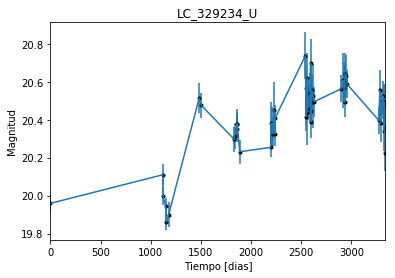

In [2]:
data = np.genfromtxt('LC_329234_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_329234_U')
plt.savefig("LC_329234_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

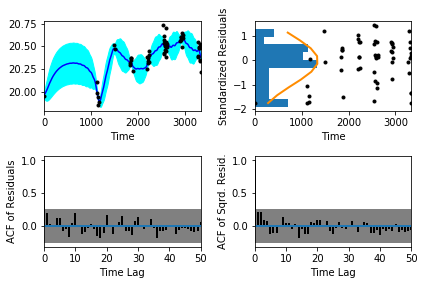

In [5]:
sample.assess_fit()

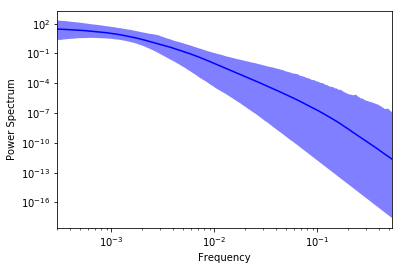

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

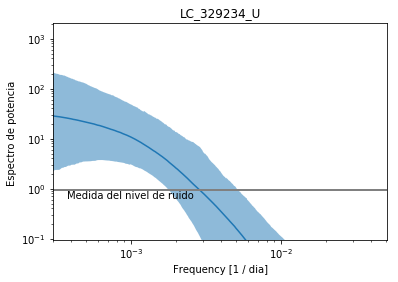

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_329234_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_329234_U')

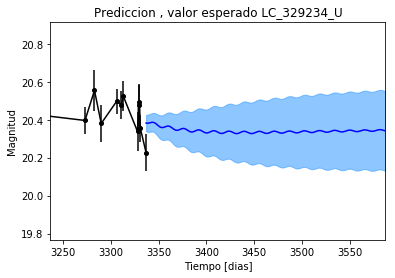

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_329234_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_329234_U')

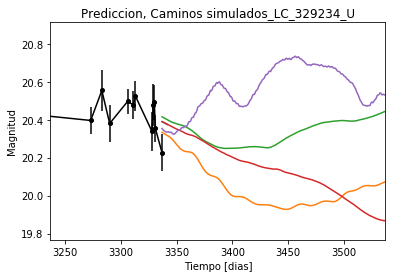

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_329234_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


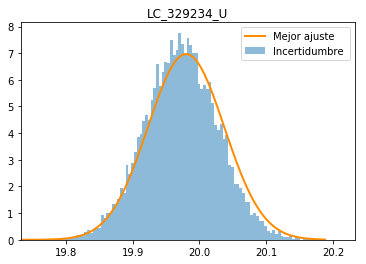

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_329234_U')
plt.savefig("Mejor_ajuste_LC_329234_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_329234_U')

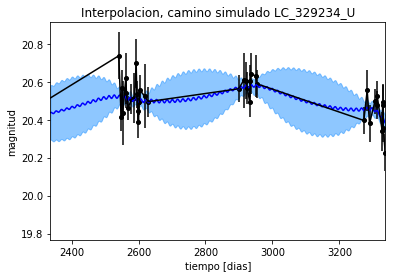

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_329234_U')

Text(0.5,1,'Interpolacion, camino simulado LC_329234_U')

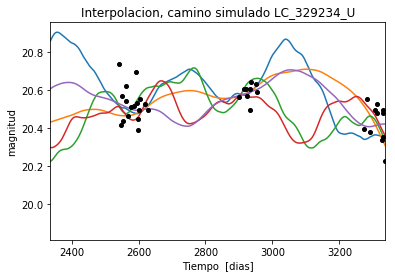

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_329234_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 733.966945609
Median: 0.00774209205707
Standard deviation: 0.200663986536
68% credibility interval: [ 0.00076653  0.17886299]
95% credibility interval: [  3.43348531e-04   8.01463009e-01]
99% credibility interval: [  3.08768678e-04   9.92409244e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 981.99903756
Median: 0.0014559285473
Standard deviation: 0.0753542944931
68% credibility interval: [ 0.00045389  0.01359892]
95% credibility interval: [ 0.0003182   0.16570004]
99% credibility interval: [  3.03208157e-04   6.72510719e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 617.596797715
Median: 0.0233256133123
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1815.06018044
Median: 78.6665710034
Standard deviation: 1.61318633324
68% credibility interval: [ 76.74627108  79.73848524]
95% credibility interval: [ 74.19770464  80.27535627]
99% credibility interval: [ 72.3055258   80.47634767]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 560.086750817
Median: 0.671128680236
Standard deviation: 2.18937594082
68% credibility interval: [ 0.06299349  4.01649625]
95% credibility interval: [ 0.01572201  7.35368364]
99% credibility interval: [  0.01058942  10.01028609]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 506.685719133
Median: 0.269529966619
Standard deviation: 8.19676852712
68% credibility interval: [ 0.00835836  5.73005272]
95% credibility interval: [  4.54518791e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 11656.8303151
Median: 3.95165845583e-37
Standard deviation: 9.65780662869e+41
68% credibility interval: [  1.93578716e-130   1.17363353e-008]
95% credibility interval: [  1.99388669e-183   1.61375703e+032]
99% credibility interval: [  9.06374353e-200   1.31308032e+041]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2543.85208523
Median: 20.3048784071
Standard deviation: 0.139132882598
68% credibility interval: [ 20.1753895   20.40890327]
95% credibility interval: [ 19.99011002  20.53970436]
99% credibility interval: [ 19.8367025   20.71377259]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 446.225006274
Median: 0.00123568313723
Standard deviation: 0.226120175955
68% credibility interval: [ 0.          0.23371291]
95% credibility interval: [ 0.          0.87155328]
99% credibility interval: [ 0.          1.00909007]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 446.225006274
Median: 0.00123568313723
Standard deviation: 0.226120175955
68% credibility interval: [ 0.          0.23371291]
95% credibility interval: [ 0.          0.87155328]
99% credibility interval: [ 0.          1.00909007]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 560.557997006
Median: 0.0
Standard deviation: 0.000498209165326
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1815.06018044
Median: 78.6665710034
Standard deviation: 1.61318633324
68% credibility interval: [ 76.74627108  79.73848524]
95% credibility interval: [ 74.19770464  80.27535627]
99% credibility interval: [ 72.3055258   80.47634767]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1527.09836536
Median: 0.0688205606614
Standard deviation: 0.0877106085344
68% credibility interval: [ 0.04126468  0.13237752]
95% credibility interval: [ 0.02593068  0.31611202]
99% credibility interval: [ 0.01962076  0.55546365]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2498.71891691
Median: 0.88642083065
Standard deviation: 0.137408608395
68% credibility interval: [ 0.75873141  1.02760591]
95% credibility interval: [ 0.66391667  1.19874005]
99% credibility interval: [ 0.60874416  1.32389247]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1672.60279058
Median: 0.000128878896255
Standard deviation: 0.0387868927566
68% credibility interval: [  1.36878145e-06   3.80210380e-03]
95% credibility interval: [  2.45307928e-36   3.87190083e-02]
99% credibility interval: [  4.52479942e-45   1.88980987e-01]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 733.966945609
Median: (-0.0486449990598-0.0580595192152j)
Standard deviation: 1.89952205602
68% credibility interval: [-1.12382930 -5.42762335e+00j -0.00481626 -4.66870632e-03j]
95% credibility interval: [ -5.03574060e+00+0.j          -2.15732245e-03-0.25686686j]
99% credibility interval: [ -6.23549118e+00+0.j          -1.94005082e-03-0.00326237j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 981.99903756
Median: (-0.0091478688567+2.96975518996j)
Standard deviation: 1.49756929032
68% credibility interval: [-0.08544451+0.j         -0.00285187+0.00411248j]
95% credibility interval: [-1.04112406+4.51692944j -0.00199930+0.j        ]
99% credibility interval: [ -4.22550947e+00+4.30439173j  -1.90511303e-03+0.00913154j]
Pos